# Import de bibliotecas dados

In [3]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import e seleção de dados (Teste e Treino)

In [5]:
df_sunspots = pd.read_csv("monthly-sunspots.csv - monthly-sunspots.csv",usecols=['Date','Monthly Mean Total Sunspot Number'])
df_sunspots["Date"] = pd.to_datetime(df_sunspots["Date"])
df_sunspots.columns = ["Date","Sunspot"]
test = df_sunspots[df_sunspots["Date"].dt.year > 2009]
train = df_sunspots[df_sunspots["Date"].dt.year <= 2009]

# Apresentação de grafico de serie temporal completa

d:\ciencias de dados\projetos\concluidos\ciencias-de-dados\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Data de coleta dos dados')

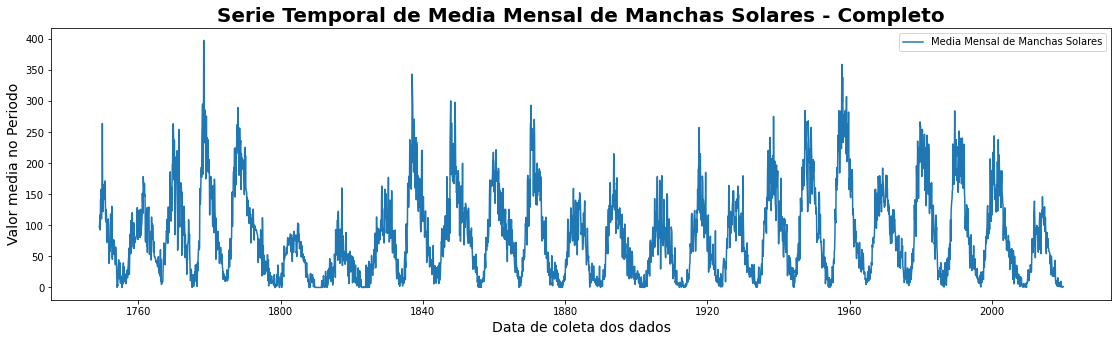

In [6]:
fig, ax = plt.subplots(figsize=(19,5))
sns.lineplot(df_sunspots.Date,df_sunspots["Sunspot"],label="Media Mensal de Manchas Solares")
ax.set_title("Serie Temporal de Media Mensal de Manchas Solares - Completo", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_ylabel('Valor media no Periodo', fontsize = 14)
ax.set_xlabel('Data de coleta dos dados', fontsize = 14)

# Apresentação de grafico de serie temporal separado  
- Treino (1750 - 2010)                                                        
- Teste  (2010 - 2020)

d:\ciencias de dados\projetos\concluidos\ciencias-de-dados\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\ciencias de dados\projetos\concluidos\ciencias-de-dados\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Data de coleta dos dados')

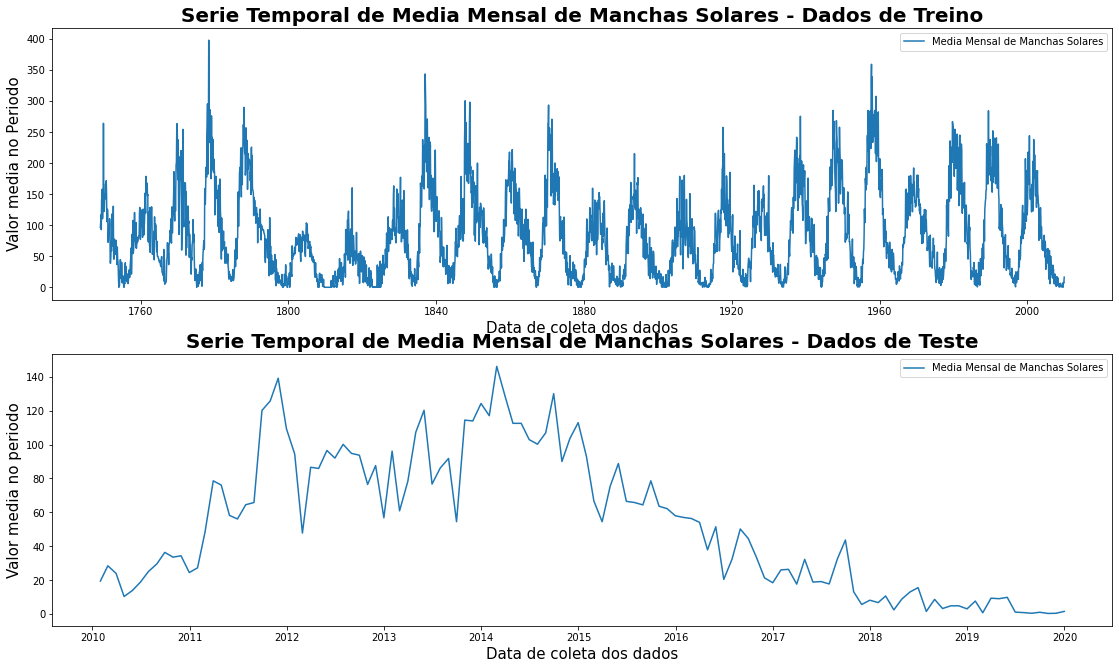

In [7]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(19,11))
sns.lineplot(train["Date"],train["Sunspot"],ax=ax0,label="Media Mensal de Manchas Solares")
ax0.set_title("Serie Temporal de Media Mensal de Manchas Solares - Dados de Treino", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax0.set_ylabel('Valor media no Periodo', fontsize = 15)
ax0.set_xlabel('Data de coleta dos dados', fontsize = 15)
sns.lineplot(test["Date"],test["Sunspot"],ax=ax1,label="Media Mensal de Manchas Solares")
ax1.set_title("Serie Temporal de Media Mensal de Manchas Solares - Dados de Teste", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax1.set_ylabel('Valor media no periodo', fontsize = 15)
ax1.set_xlabel('Data de coleta dos dados', fontsize = 15)

# Funções para Calculo Regreção Linear

In [8]:
class LR_Estimator(BaseEstimator):
    #Função retorna MSE da previsão
    def score(self,y_true,y_pred):
        self.mse = mean_squared_error(y_true,y_pred)
        return self.mse
    #Função que faz o calculo da regressão linear
    def fit(self,X,y):
        self.k = len(X.columns)
        self.Xb = np.c_[np.ones((X.shape[0],1)),X] #adding x0 = 1
        self.theta_ = np.linalg.inv(self.Xb.T.dot(self.Xb)).dot(self.Xb.T).dot(y)
    
    #Função que predição
    def predict(self,X_test):
        self.X_new = np.c_[np.ones((len(X_test),1)),X_test]
        y_predict = self.X_new.dot(self.theta_)
        return y_predict
    #Função de criação de matrix de variaveis
    def createMatrix(self,data,k):
        self.matriz = []
        self.y = []
        for self.m in range(0,len(data)):
            if len(data[self.m:self.m+k]) >= k:
                try :
                    self.y.append(data[self.m+k])
                    self.matriz.append(data[self.m:self.m+k].values)
                except:
                    pass
        self.mt = pd.DataFrame(self.matriz,index=range(k,len(self.matriz)+k)).reset_index(drop=True)
        return self.mt,self.y

# Execução de Kfold e calculo de MSE

In [9]:
list_mse = []
l_r = []
for k in range(1,25):
    error = []
    lr = LR_Estimator()
    X,y = lr.createMatrix(train["Sunspot"],k)

    step = int(len(X)/5)
    X_1 = X[:step]
    X_2 = X[step:step*2]
    X_3 = X[step*2:step*3]
    X_4 = X[step*3:step*4]
    X_5 = X[step*4:step*5]

    y_1 = y[:step]
    y_2 = y[step:step*2]
    y_3 = y[step*2:step*3]
    y_4 = y[step*3:step*4]
    y_5 = y[step*4:step*5]

    X_1_train = pd.concat([X_2,X_3,X_4,X_5]).reset_index(drop=True)
    y_1_train = y_2+y_3+y_4+y_5
    X_1_valid = X_1
    y_1_valid = y_1
    lr.fit(X_1_valid,y_1_valid)
    y_chapeu_X_1 = lr.predict(X_1_valid)
    error.append(lr.score(y_1_valid,y_chapeu_X_1))

    X_2_train = pd.concat([X_1,X_3,X_4,X_5]).reset_index(drop=True)
    y_2_train = y_1+y_3+y_4+y_5
    X_2_valid = X_2
    y_2_valid = y_2
    lr.fit(X_2_valid,y_2_valid)
    y_chapeu_X_2 = lr.predict(X_2_valid)
    error.append(lr.score(y_2_valid,y_chapeu_X_2))

    X_3_train = pd.concat([X_1,X_2,X_4,X_5]).reset_index(drop=True)
    y_3_train = y_1+y_2+y_4+y_5
    X_3_valid = X_3
    y_3_valid = y_3
    lr.fit(X_3_valid,y_3_valid)
    y_chapeu_X_3 = lr.predict(X_3_valid)
    error.append(lr.score(y_3_valid,y_chapeu_X_3))

    X_4_train = pd.concat([X_1,X_2,X_3,X_5]).reset_index(drop=True)
    y_4_train = y_1+y_2+y_3+y_5
    X_4_valid = X_4
    y_4_valid = y_4
    lr.fit(X_4_valid,y_4_valid)
    y_chapeu_X_4 = lr.predict(X_4_valid)
    error.append(lr.score(y_4_valid,y_chapeu_X_4))

    X_5_train = pd.concat([X_1,X_2,X_3,X_4]).reset_index(drop=True)
    y_5_train = y_1+y_2+y_3+y_4
    X_5_valid = X_5
    y_5_valid = y_5
    lr.fit(X_5_valid,y_5_valid)
    y_chapeu_X_5 = lr.predict(X_5_valid)
    error.append(lr.score(y_5_valid,y_chapeu_X_5))
    list_mse.append(sum(error) / len(error))
mse = pd.Series(list_mse,index=range(1,len(list_mse)+1))

# Comparação grafica de RMSE por numero de atrasos

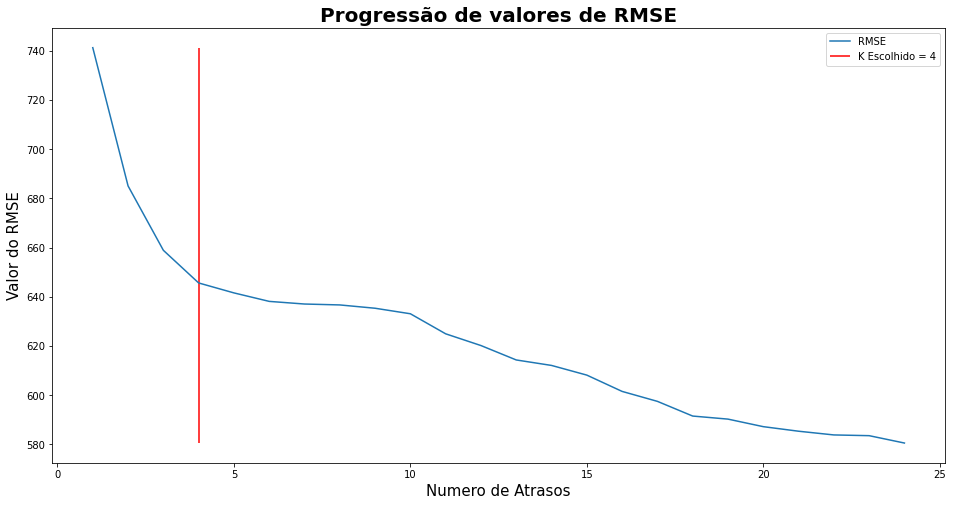

In [10]:
fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=mse.index,y=mse,label="RMSE")
ax.set_title("Progressão de valores de RMSE", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_ylabel('Valor do RMSE', fontsize = 15)
ax.set_xlabel('Numero de Atrasos', fontsize = 15)
plt.vlines(4,mse.min(),mse.max(),colors='r',label="K Escolhido = 4")
plt.legend()

# Execução de codigo com a numero de atrasos definido e apresentação de grafico

In [11]:
lr = LR_Estimator()
X,y = lr.createMatrix(train["Sunspot"],4)
lr.fit(X,y)
X_1,y_1 = lr.createMatrix(test["Sunspot"].reset_index(drop=True),4)
y_prev = lr.predict(X_1)
erro_rmse = lr.score(y_1,y_prev)
y_1 = pd.Series(y_1)
y_prev = pd.Series(y_prev)

NameError: name 'rmse' is not defined

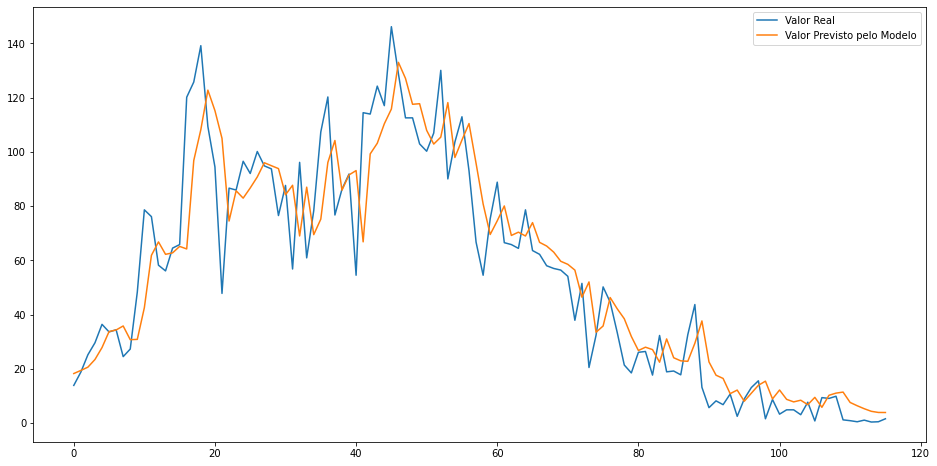

In [12]:
fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=y_1.index,y=y_1,label="Valor Real")
sns.lineplot(x=y_prev.index,y=y_prev,label="Valor Previsto pelo Modelo")
ax.set_title("Serie Temporal de Media Mensal de Manchas Solares - Comparação \n RMSE = {}".format(rmse(y_prev,y_1)), fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_ylabel('Valor media no periodo', fontsize = 15)
ax.set_xlabel('Periodo de coleta dos dados', fontsize = 15)

In [13]:
def returnA_B(a,Ex,Ey,ExQuad,Exy):
    aa = a/a
    ab = Ex/a
    ac = Ey/a
    p1 = Ex-aa*Ex
    p2 = ExQuad-ab*Ex
    p3 = Exy-ac*Ex
    pa = p2/p2
    pb = p3/p2
    A = pb/pa
    B = ac-ab*A
    return round(A, 5),round(B, 5)

#Função que retorna o RMSE da predições
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#Função de execução de quadrados minimos
def least_square(X,k):
    ind_prev_arr = []
    y_prev_arr = []
    for l in range(len(X)-k):
        Xk = X[l:l+k]
        xq = Xk.apply(lambda x : x**2)
        ExQuad = 0
        Exy = 0
        for ind in Xk.index:
            ExQuad = ExQuad + (ind**2)
            Exy = (ind * Xk[ind]) + Exy
        Ex = sum(Xk.index)
        Ey = sum(Xk.values)
        AA,BB = returnA_B(len(Xk),Ex,Ey,ExQuad,Exy)
        ind_prev = k+l
        y_prev = (ind_prev*AA) + BB
        ind_prev_arr.append(ind_prev)
        y_prev_arr.append(y_prev)
    resp = pd.Series(y_prev_arr,index=ind_prev_arr)
    fim = rmse(resp, X[k:1000])
    return resp
  
#Função de Criação de matrix PHI
def CreateMatrix(data,k):
    matriz = []
    y = []
    for m in range(0,len(data)):
        if len(data[m:m+k]) >= k:
            try :
                y.append(data[m+k])
                matriz.append(data[m:m+k].values)
            except:
                pass

    mt = pd.DataFrame(matriz,index=range(k,len(matriz)+k)).reset_index(drop=True)
    return mt,y

In [ ]:
K = np.arange(2,30)
resp_k = []
resp_fim = []
X,y = CreateMatrix(train["Sunspot"],27)
for kn in K:
    resp_k.append(kn)
    resp_fim.append(least_square(train.Sunspot,kn))

In [ ]:
rp = pd.Series(resp_fim,index=resp_k)

In [ ]:
temp = pd.DataFrame()
data = pd.DataFrame()
ind = 0
for i in rp:
  temp = pd.DataFrame(i,columns=[ind])
  data[ind] = temp[ind]
  ind = ind + 1

In [ ]:
df_pred_compare = data[27:]
list_real_compare = train.Sunspot[27:]

In [ ]:
k_rms = []
v_rms = []
for nk in df_pred_compare.columns:
  v_rms.append(rmse(df_pred_compare[nk],list_real_compare))
  k_rms.append(nk)

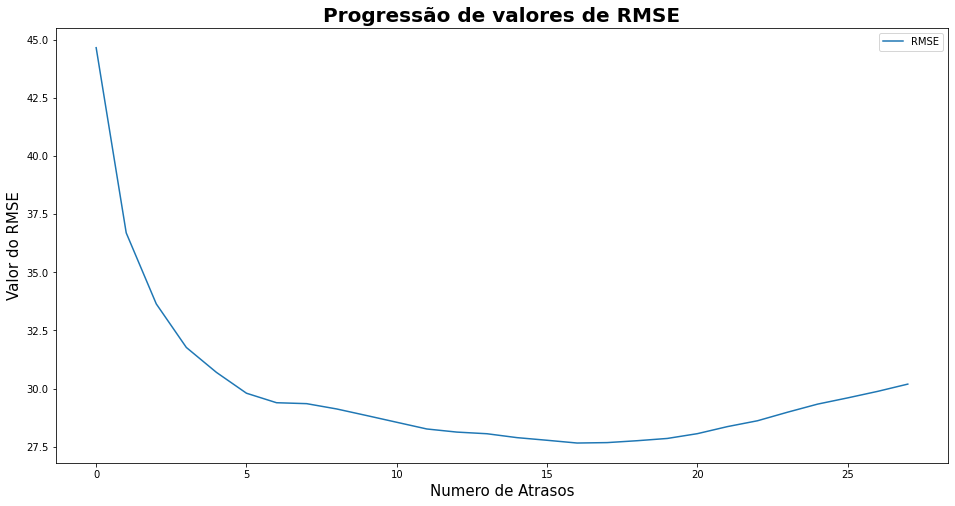

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=k_rms,y=v_rms,label="RMSE")
ax.set_title("Progressão de valores de RMSE", fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_ylabel('Valor do RMSE', fontsize = 15)
ax.set_xlabel('Numero de Atrasos', fontsize = 15)
plt.legend()

Text(0.5, 0, 'Periodo de coleta dos dados')

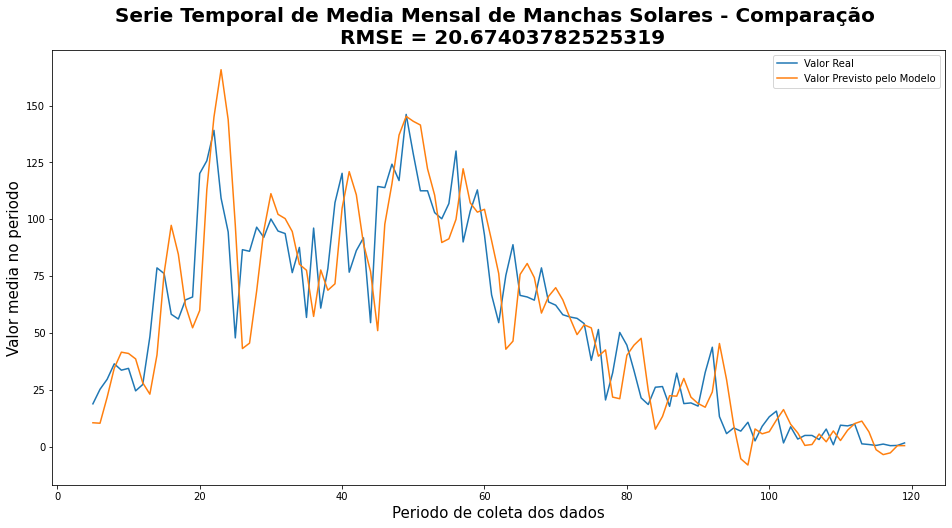

In [ ]:
mt = least_square(test["Sunspot"].reset_index(drop=True),5)
y_mt = test.reset_index(drop=True)["Sunspot"][5:]

fig,ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=y_mt.index,y=y_mt,label="Valor Real")
sns.lineplot(x=mt.index,y=mt,label="Valor Previsto pelo Modelo")
ax.set_title("Serie Temporal de Media Mensal de Manchas Solares - Comparação \n RMSE = {}".format(rmse(mt,y_mt)), fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_ylabel('Valor media no periodo', fontsize = 15)
ax.set_xlabel('Periodo de coleta dos dados', fontsize = 15)